## Plotting code for noise experiments

This notebook contains a great deal of plotting code for noise experiments conducted in May 2018 by Max Schwarzer.  It assumes that results will be a set of .json files placed in results/, which are laid out in the format created by noise_simulation.py.  This code employs matplotlib, operating on top of Pandas.  As such, it should be easily modified by a user.

In [1]:
import cPickle as pkl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
plt.style.use('seaborn')
import seaborn as sns
import numpy as np
import pandas as pd
import json
import glob

# Helper functions for parsing the simulation output.
def dict_to_mean(failure_dict):
    items = 0
    counter = 0
    for key, value in failure_dict.items():
        if key is None or key == "null":
            continue
        items += int(value)
        counter += int(key)*int(value)
    if items == 0:
        return 40
    return(counter/items)

def failureRate(failure_dict):
    items = 0.
    failed = 0.
    for key, value in failure_dict.items():
        if key is None or key == "null":
            failed += int(value)
            items += int(value)
        else:
            items += int(value)
    return(failed/items)

In [2]:
resultsFiles = glob.glob("results/*.json")
results = []
for f in resultsFiles:
    with open(f, "rb") as ff:
        results += json.load(ff)

# Some old data may not include a threshold, so set it to the default.
for experiment in results:
    if "threshold" not in experiment[0]:
        experiment[0]["threshold"] = 16
        
        
jointDfResults = pd.DataFrame([r[0] for r in results])
jointDfResults["convergence"] = [r[1] for r in results]
jointDfResults["failureRate"] = [failureRate(r) for r in jointDfResults["convergence"]]
jointDfResults["meanTime"] = [dict_to_mean(r) for r in jointDfResults["convergence"]]


# Split by method and threshold, and compare pairwise results
thresh12DfResults = jointDfResults.query("threshold==12")
thresh16DfResults = jointDfResults.query("threshold==16")
pairedThresholdResults = thresh12DfResults.merge(thresh16DfResults, on = ["numObjects",
                                                                  "moduleNoiseFactor",
                                                                  "noiseFactor",
                                                                  "anchoringMethod"], how = "inner")
pairedThresholdResults["difference"] = pairedThresholdResults["failureRate_x"] - pairedThresholdResults["failureRate_y"]

narrowingDfResults = jointDfResults.query("anchoringMethod=='narrowing'")
reanchoringDfResults = jointDfResults.query("anchoringMethod=='reanchoring'")

pairedMethodResults = narrowingDfResults.merge(reanchoringDfResults, on = ["numObjects",
                                                                  "moduleNoiseFactor",
                                                                  "noiseFactor",
                                                                  "threshold"], how = "inner")
pairedMethodResults["difference"] = pairedMethodResults["failureRate_y"] - pairedMethodResults["failureRate_x"]

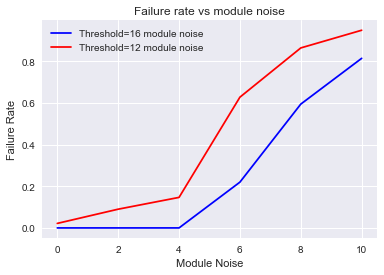

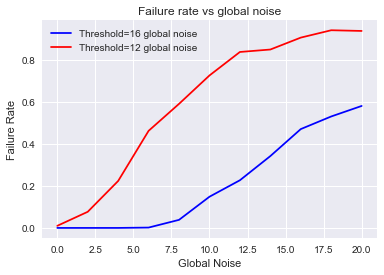

In [3]:
thresh16fixedObjectResults = thresh16DfResults.query("numObjects==600")
thresh16noiseResults = thresh16fixedObjectResults.query("moduleNoiseFactor == 0")
thresh16moduleNoiseResults = thresh16fixedObjectResults.query("noiseFactor == 0")

thresh12fixedObjectResults = thresh12DfResults.query("numObjects==600")
thresh12noiseResults = thresh12fixedObjectResults.query("moduleNoiseFactor == 0")
thresh12moduleNoiseResults = thresh12fixedObjectResults.query("noiseFactor == 0")

thresh16Results = thresh16moduleNoiseResults.query("anchoringMethod == 'reanchoring'") 
plt.plot(thresh16Results["moduleNoiseFactor"], thresh16Results["failureRate"], color = "blue", label = "Threshold=16 module noise")

thresh12Results = thresh12moduleNoiseResults.query("anchoringMethod == 'reanchoring'") 
plt.plot(thresh12Results["moduleNoiseFactor"][1:], thresh12Results["failureRate"][1:], color = "red", label = "Threshold=12 module noise")


plt.legend(loc = "best")
plt.xlabel("Module Noise")
plt.ylabel("Failure Rate")
plt.title("Failure rate vs module noise")
plt.savefig("ModuleNoiseThresholdComparisonLine.png")
plt.show()

thresh16Results = thresh16noiseResults.query("anchoringMethod == 'reanchoring'") 
plt.plot(thresh16Results["noiseFactor"][:-1], thresh16Results["failureRate"][:-1], color = "blue", label = "Threshold=16 global noise")

thresh12Results = thresh12noiseResults.query("anchoringMethod == 'reanchoring'") 
plt.plot(thresh12Results["noiseFactor"][:-1], thresh12Results["failureRate"][:-1], color = "red", label = "Threshold=12 global noise")


plt.legend(loc = "best")
plt.xlabel("Global Noise")
plt.ylabel("Failure Rate")
plt.title("Failure rate vs global noise")
plt.savefig("GlobalNoiseThresholdComparisonLine.png")
plt.show()

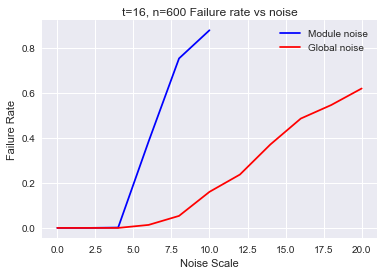

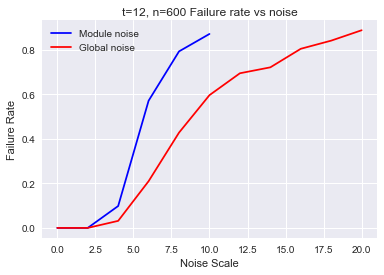

In [4]:
thresh16fixedObjectResults = thresh16DfResults.query("numObjects==600")
thresh16noiseResults = thresh16fixedObjectResults.query("moduleNoiseFactor == 0")
thresh16moduleNoiseResults = thresh16fixedObjectResults.query("noiseFactor == 0")

thresh12fixedObjectResults = thresh12DfResults.query("numObjects==600")
thresh12noiseResults = thresh12fixedObjectResults.query("moduleNoiseFactor == 0")
thresh12moduleNoiseResults = thresh12fixedObjectResults.query("noiseFactor == 0")

thresh16Results = thresh16moduleNoiseResults.query("anchoringMethod == 'narrowing'") 
plt.plot(thresh16Results["moduleNoiseFactor"], thresh16Results["failureRate"], color = "blue", label = "Module noise")

thresh16Results = thresh16noiseResults.query("anchoringMethod == 'narrowing'") 
plt.plot(thresh16Results["noiseFactor"][:-1], thresh16Results["failureRate"][:-1], color = "red", label = "Global noise")


plt.legend(loc = "best")
plt.xlabel("Noise Scale")
plt.ylabel("Failure Rate")
plt.title("t=16, n=600 Failure rate vs noise")
plt.savefig("600ojbT16NoiseComparison.png", dpi = 250)
plt.show()


thresh12Results = thresh12moduleNoiseResults.query("anchoringMethod == 'narrowing'") 
plt.plot(thresh12Results["moduleNoiseFactor"], thresh12Results["failureRate"], color = "blue", label = "Module noise")

thresh12Results = thresh12noiseResults.query("anchoringMethod == 'narrowing'") 
plt.plot(thresh12Results["noiseFactor"][:-1], thresh12Results["failureRate"][:-1], color = "red", label = "Global noise")


plt.legend(loc = "best")
plt.xlabel("Noise Scale")
plt.ylabel("Failure Rate")
plt.title("t=12, n=600 Failure rate vs noise")
plt.savefig("600ojbT12NoiseComparison.png", dpi = 250)
plt.show()

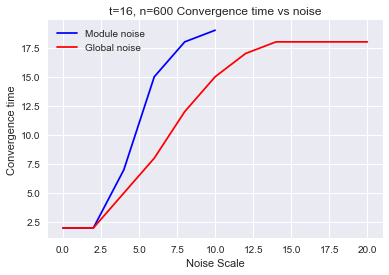

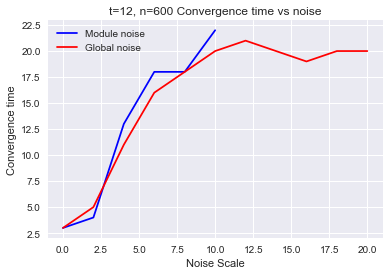

In [5]:
thresh16Results = thresh16moduleNoiseResults.query("anchoringMethod == 'narrowing'") 
plt.plot(thresh16Results["moduleNoiseFactor"], thresh16Results["meanTime"], color = "blue", label = "Module noise")

thresh16Results = thresh16noiseResults.query("anchoringMethod == 'narrowing'") 
plt.plot(thresh16Results["noiseFactor"][:-1], thresh16Results["meanTime"][:-1], color = "red", label = "Global noise")


plt.legend(loc = "best")
plt.xlabel("Noise Scale")
plt.ylabel("Convergence time")
plt.title("t=16, n=600 Convergence time vs noise")
plt.savefig("600ojbT16NoiseTimeComparison.png", dpi = 250)
plt.show()

thresh12Results = thresh12moduleNoiseResults.query("anchoringMethod == 'narrowing'") 
plt.plot(thresh12Results["moduleNoiseFactor"], thresh12Results["meanTime"], color = "blue", label = "Module noise")

thresh12Results = thresh12noiseResults.query("anchoringMethod == 'narrowing'") 
plt.plot(thresh12Results["noiseFactor"][:-1], thresh12Results["meanTime"][:-1], color = "red", label = "Global noise")


plt.legend(loc = "best")
plt.xlabel("Noise Scale")
plt.ylabel("Convergence time")
plt.title("t=12, n=600 Convergence time vs noise")
plt.savefig("600ojbT12NoiseTimeComparison.png", dpi = 250)
plt.show()

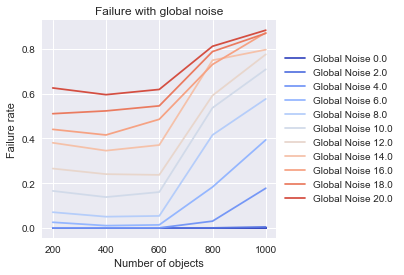

In [6]:
fig = plt.figure()
ax = plt.subplot(111)

thresh16noiseResults = thresh16DfResults.query("moduleNoiseFactor == 0")
bound = len(thresh16noiseResults.groupby(["noiseFactor"])) + 0.
for i, (noise, data) in enumerate(thresh16noiseResults.groupby(["noiseFactor"])):
    data = data.query("anchoringMethod == 'narrowing'")
    plt.plot(data["numObjects"],
             data["failureRate"],
             color = cm.coolwarm(i/bound),
             label = "Global Noise {}".format(noise))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.70, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("Number of objects")
plt.ylabel("Failure rate")
plt.title("Failure with global noise")
plt.savefig("GlobalNoiseLinePlot.png", dpi = 250)
plt.show()

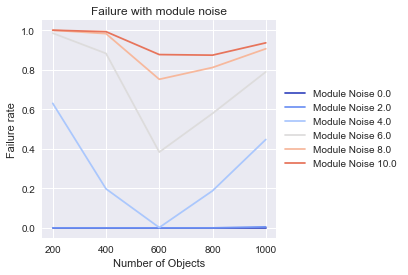

In [7]:
fig = plt.figure()
ax = plt.subplot(111)

moduleNoiseResults = thresh16DfResults.query("noiseFactor == 0")
bound = len(moduleNoiseResults.groupby(["moduleNoiseFactor"])) + 0.
for i, (noise, data) in enumerate(moduleNoiseResults.groupby(["moduleNoiseFactor"])):
    data = data.query("anchoringMethod == 'narrowing'")
    plt.plot(data["numObjects"][:5],
             data["failureRate"][:5],
             color = cm.coolwarm(i/bound),
             label = "Module Noise {}".format(noise))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("Number of Objects")
plt.ylabel("Failure rate")
plt.title("Failure with module noise")
plt.savefig("ModuleNoiseLinePlot.png", dpi = 250)
plt.show()

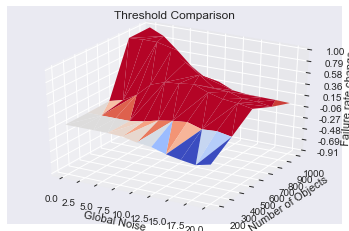

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
for method, group in pairedThresholdResults.groupby(["anchoringMethod"]):
    if method not in ["reanchoring"]: continue
    
# Plot the surface.
    surf = ax.plot_trisurf(group.noiseFactor,
                           group.numObjects,
                           group.difference,
                           cmap=cm.coolwarm,
                           linewidth=0,
                           vmin = -.1,
                           vmax = .1,
                           antialiased=True)

ax.set_xlabel("Global Noise")
ax.set_ylabel("Number of Objects")
ax.set_zlabel("Failure rate change")
plt.title("Threshold Comparison")


# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.view_init(30, 90 + 210)
plt.savefig("ThresholdComparisonGlobalNoise.png", dpi = 250)
plt.draw()
plt.show()

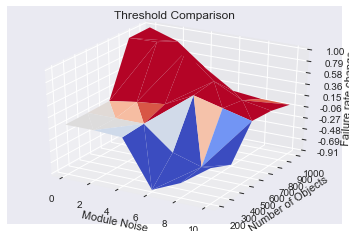

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
for method, group in pairedThresholdResults.groupby(["anchoringMethod"]):
    if method not in ["reanchoring"]: continue
    
# Plot the surface.
    surf = ax.plot_trisurf(group.moduleNoiseFactor,
                           group.numObjects,
                           group.difference,
                           cmap=cm.coolwarm,
                           linewidth=0,
                           vmin = -.1,
                           vmax = .1,
                           antialiased=True)

ax.set_xlabel("Module Noise")
ax.set_ylabel("Number of Objects")
ax.set_zlabel("Failure rate change")
plt.title("Threshold Comparison")


# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.view_init(30, 90 + 210)
plt.savefig("ThresholdComparisonModuleNoise.png", dpi = 250)
plt.draw()
plt.show()

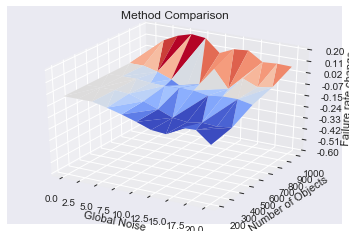

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
data = pairedMethodResults.query("threshold==16")
surf = ax.plot_trisurf(data.noiseFactor,
                       data.numObjects,
                       data.difference,
                       cmap=cm.coolwarm,
                       linewidth=0,
                       vmin = -.1,
                       vmax = .1,
                       antialiased=True)

ax.set_xlabel("Global Noise")
ax.set_ylabel("Number of Objects")
ax.set_zlabel("Failure rate change")
plt.title("Method Comparison")


# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.view_init(30, 90 + 210)
plt.savefig("MethodGlobalNoiseComparison.png", dpi = 250)
plt.draw()
plt.show()

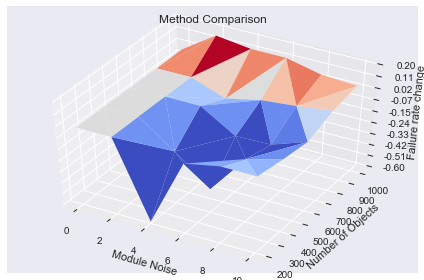

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
data = pairedMethodResults.query("threshold==16")
surf = ax.plot_trisurf(data.moduleNoiseFactor,
                       data.numObjects,
                       data.difference,
                       cmap=cm.coolwarm,
                       linewidth=0,
                       vmin = -.1,
                       vmax = .1,
                       antialiased=True)

ax.set_xlabel("Module Noise")
ax.set_ylabel("Number of Objects")
ax.set_zlabel("Failure rate change")
plt.title("Method Comparison")


# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.tight_layout()
ax.view_init(45, 90 + 210)
plt.savefig("MethodModuleNoiseComparison.png", dpi = 250)
plt.draw()
plt.show()

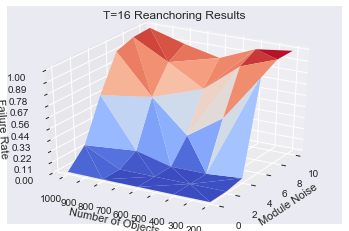

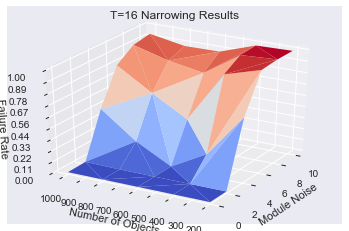

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')


# Make data.
data = thresh16DfResults.query("noiseFactor==0")
data = data.query("anchoringMethod=='reanchoring'")
# Plot the surface.
surf = ax.plot_trisurf(data.moduleNoiseFactor,
                       data.numObjects,
                       data.failureRate,
                       linewidth=0,
                       cmap=cm.coolwarm,
                       vmin = 0,
                       vmax = 1,
                       antialiased=True)

ax.set_xlabel("Module Noise")
ax.set_ylabel("Number of Objects")
ax.set_zlabel("Failure Rate")
plt.title("T=16 Reanchoring Results")

# Customize the z axis.
ax.set_zlim(0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.view_init(30, 0 + 210)
plt.savefig("T16ReanchoringModule3DFailureSurface.png", dpi = 250)
plt.draw()
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
data = thresh16DfResults.query("noiseFactor==0")
data = data.query("anchoringMethod=='narrowing'")
# Plot the surface.
surf = ax.plot_trisurf(data.moduleNoiseFactor,
                       data.numObjects,
                       data.failureRate,
                       linewidth=0,
                       cmap=cm.coolwarm,
                       vmin = 0,
                       vmax = 1,
                       antialiased=True)

ax.set_xlabel("Module Noise")
ax.set_ylabel("Number of Objects")
ax.set_zlabel("Failure Rate")
plt.title("T=16 Narrowing Results")

# Customize the z axis.
ax.set_zlim(0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.view_init(30, 0 + 210)
plt.savefig("T16NarrowingModule3DFailureSurface.png", dpi = 250)
plt.draw()
plt.show()

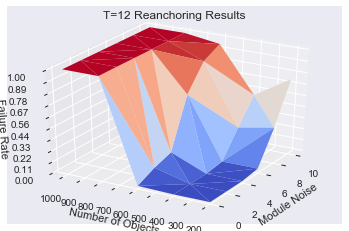

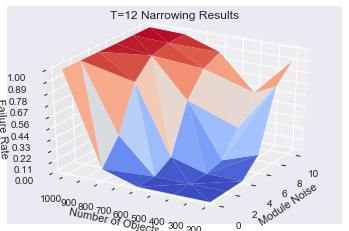

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')


# Make data.
data = thresh12DfResults.query("noiseFactor==0")
data = data.query("anchoringMethod=='reanchoring'")
# Plot the surface.
surf = ax.plot_trisurf(data.moduleNoiseFactor,
                       data.numObjects,
                       data.failureRate,
                       linewidth=0,
                       cmap=cm.coolwarm,
                       vmin = 0,
                       vmax = 1,
                       antialiased=True)

ax.set_xlabel("Module Noise")
ax.set_ylabel("Number of Objects")
ax.set_zlabel("Failure Rate")
plt.title("T=12 Reanchoring Results")

# Customize the z axis.
ax.set_zlim(0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.view_init(30, 0 + 210)
plt.savefig("T12ReanchoringModule3DFailureSurface.png", dpi = 250)
plt.draw()
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
data = thresh12DfResults.query("noiseFactor==0")
data = data.query("anchoringMethod=='narrowing'")
# Plot the surface.
surf = ax.plot_trisurf(data.moduleNoiseFactor,
                       data.numObjects,
                       data.failureRate,
                       linewidth=0,
                       cmap=cm.coolwarm,
                       vmin = 0,
                       vmax = 1,
                       antialiased=True)

ax.set_xlabel("Module Noise")
ax.set_ylabel("Number of Objects")
ax.set_zlabel("Failure Rate")
plt.title("T=12 Narrowing Results")

# Customize the z axis.
ax.set_zlim(0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.view_init(30, 0 + 210)
plt.savefig("T12NarrowingModule3DFailureSurface.png", dpi = 250)
plt.draw()
plt.show()

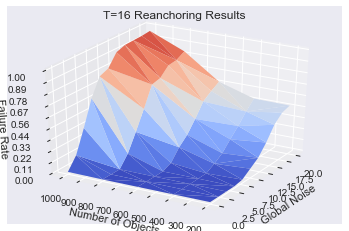

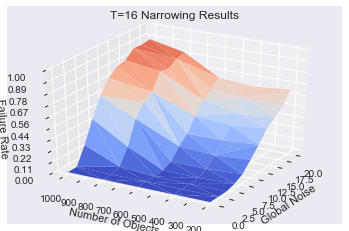

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')


# Make data.
data = thresh16DfResults.query("moduleNoiseFactor==0")
data = data.query("anchoringMethod=='reanchoring'")
# Plot the surface.
surf = ax.plot_trisurf(data.noiseFactor,
                       data.numObjects,
                       data.failureRate,
                       linewidth=0,
                       cmap=cm.coolwarm,
                       vmin = 0,
                       vmax = 1,
                       antialiased=True)

ax.set_xlabel("Global Noise")
ax.set_ylabel("Number of Objects")
ax.set_zlabel("Failure Rate")
plt.title("T=16 Reanchoring Results")

# Customize the z axis.
ax.set_zlim(0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.view_init(30, 0 + 210)
plt.savefig("T16ReanchoringGlobal3DFailureSurface.png", dpi = 250)
plt.draw()
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
data = thresh16DfResults.query("moduleNoiseFactor==0")
data = data.query("anchoringMethod=='narrowing'")
# Plot the surface.
surf = ax.plot_trisurf(data.noiseFactor,
                       data.numObjects,
                       data.failureRate,
                       linewidth=0,
                       cmap=cm.coolwarm,
                       vmin = 0,
                       vmax = 1,
                       antialiased=True)

ax.set_xlabel("Global Noise")
ax.set_ylabel("Number of Objects")
ax.set_zlabel("Failure Rate")
plt.title("T=16 Narrowing Results")

# Customize the z axis.
ax.set_zlim(0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.view_init(30, 0 + 210)
plt.savefig("T16NarrowingGlobal3DFailureSurface.png", dpi = 250)
plt.draw()
plt.show()

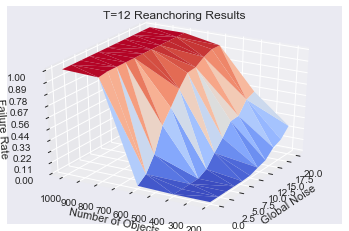

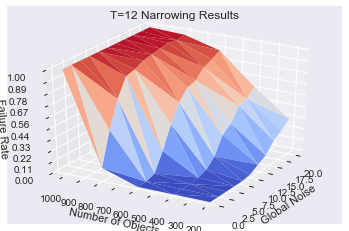

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')


# Make data.
data = thresh12DfResults.query("moduleNoiseFactor==0")
data = data.query("anchoringMethod=='reanchoring'")
# Plot the surface.
surf = ax.plot_trisurf(data.noiseFactor,
                       data.numObjects,
                       data.failureRate,
                       linewidth=0,
                       cmap=cm.coolwarm,
                       vmin = 0,
                       vmax = 1,
                       antialiased=True)

ax.set_xlabel("Global Noise")
ax.set_ylabel("Number of Objects")
ax.set_zlabel("Failure Rate")
plt.title("T=12 Reanchoring Results")

# Customize the z axis.
ax.set_zlim(0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.view_init(30, 0 + 210)
plt.savefig("T12ReanchoringGlobal3DFailureSurface.png", dpi = 250)
plt.draw()
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
data = thresh12DfResults.query("moduleNoiseFactor==0")
data = data.query("anchoringMethod=='narrowing'")
# Plot the surface.
surf = ax.plot_trisurf(data.noiseFactor,
                       data.numObjects,
                       data.failureRate,
                       linewidth=0,
                       cmap=cm.coolwarm,
                       vmin = 0,
                       vmax = 1,
                       antialiased=True)

ax.set_xlabel("Global Noise")
ax.set_ylabel("Number of Objects")
ax.set_zlabel("Failure Rate")
plt.title("T=12 Narrowing Results")

# Customize the z axis.
ax.set_zlim(0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.view_init(30, 0 + 210)
plt.savefig("T12NarrowingGlobal3DFailureSurface.png", dpi = 250)
plt.draw()
plt.show()

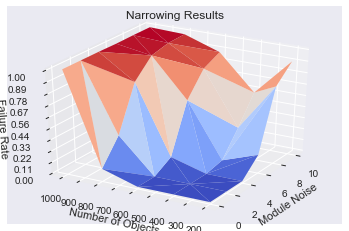

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
data = thresh12DfResults.query("noiseFactor==0")
data = data.query("anchoringMethod=='narrowing'")

# Plot the surface.
surf = ax.plot_trisurf(data.moduleNoiseFactor,
                       data.numObjects,
                       data.failureRate,
                       linewidth=0,
                       cmap=cm.coolwarm,
                       antialiased=True)

ax.set_xlabel("Module Noise")
ax.set_ylabel("Number of Objects")
ax.set_zlabel("Failure Rate")
plt.title("Narrowing Results")

# Customize the z axis.
ax.set_zlim(0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.view_init(30, -0 + 210)
plt.savefig("T12NarrowingModule3DFailureSurface.png", dpi = 250)
plt.draw()
plt.show()

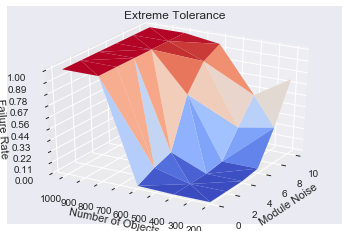

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
data = thresh12DfResults.query("noiseFactor==0")
data = data.query("anchoringMethod=='reanchoring'")
# Plot the surface.
surf = ax.plot_trisurf(data.moduleNoiseFactor,
                       data.numObjects,
                       data.failureRate,
                       linewidth=0,
                       cmap=cm.coolwarm,
                       vmin = 0,
                       vmax = 1,
                       antialiased=True)

ax.set_xlabel("Module Noise")
ax.set_ylabel("Number of Objects")
ax.set_zlabel("Failure Rate")
plt.title("Extreme Tolerance")

# Customize the z axis.
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.view_init(30, 0 + 210)
plt.savefig("TolerancExtreme.png", dpi = 250)
plt.draw()
plt.show()

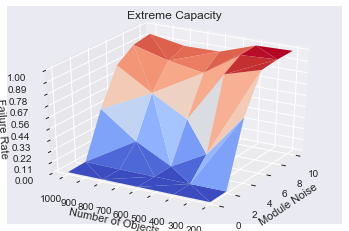

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
data = thresh16DfResults.query("noiseFactor==0")
data = data.query("anchoringMethod=='narrowing'")
# Plot the surface.
surf = ax.plot_trisurf(data.moduleNoiseFactor,
                       data.numObjects,
                       data.failureRate,
                       linewidth=0,
                       cmap=cm.coolwarm,
                       vmin = 0,
                       vmax = 1,
                       antialiased=True)

ax.set_xlabel("Module Noise")
ax.set_ylabel("Number of Objects")
ax.set_zlabel("Failure Rate")
plt.title("Extreme Capacity")

# Customize the z axis.
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.view_init(30, 0 + 210)
plt.savefig("CapacityExtreme.png", dpi = 250)
plt.draw()
plt.show()